# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces

### Ejercicio

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

- Lleva a cabo el análisis exploratorio de datos
- Identificar operadores ineficaces
- Prueba las hipótesis estadísticas

### Descripción de los datos

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

 

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

Haz una lista de 5 a 10 fuentes (documentación, artículos, etc) que usaste mientras trabajabas en el proyecto. Brinda explicaciones breves sobre las preguntas que cada fuente te ayudó a responder. Prepara una presentación con tus conclusiones. Puedes usar cualquier herramienta que quieras para hacer la presentación, pero debes enviarla en PDF. Coloca el enlace en el cuerpo del proyecto principal.

# Plan del Proyecto: Identificar Operadores Ineficaces (CallMeMaybe)
## 1. Importación y comprensión inicial de los datos

**Objetivo: Cargar y revisar los datasets para conocer su estructura y calidad.**

- Cargar los archivos telecom_clients.csv y telecom_dataset_new.csv usando pandas.
- Visualizar las primeras filas y las dimensiones de los datasets.
- Verificar los tipos de datos (dtypes).
- Convertir las fechas (date, date_start) a formato datetime.
- Identificar valores faltantes y duplicados.
- Comprobar coherencia de fechas y tipos de llamadas.

In [2]:
# Importando librerías 
import pandas as pd           
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns          
import plotly.express as px
import matplotlib.dates as mdates
from scipy import stats     
import warnings
warnings.filterwarnings('ignore') 

# Configuracion general
pd.options.display.float_format = '{:,.2f}'.format

In [3]:

# Cargar Datasets
calls = pd.read_csv('telecom_dataset_new.csv')
clients = pd.read_csv('telecom_clients.csv')


#Vista previa
display(calls.head())
display(clients.head())

#Informacion general
print(f"Llamadas → Filas: {calls.shape[0]}, Columnas: {calls.shape[1]}")
print(f"Clientes → Filas: {clients.shape[0]}, Columnas: {clients.shape[1]}")

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,"880,022.00",True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,"880,020.00",True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,"880,020.00",False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,"880,022.00",True,3,0,25


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


Llamadas → Filas: 53902, Columnas: 9
Clientes → Filas: 732, Columnas: 3


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [5]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


**Observaciones iniciales:**
- La columna 'date' en calls y 'date_start' en clients están como 'object', deberían convertirse a datetime.
- 'operator_id' tiene comas y tipo float, se debe limpiar para convertir a entero o string.
- 'internal' debería ser booleana (True/False), pero actualmente es object.
- Las demás columnas numéricas parecen correctas (int64).

In [6]:
# Convertir columnas de fecha a datetime 
calls['date'] = pd.to_datetime(calls['date'], errors='coerce')
clients['date_start'] = pd.to_datetime(clients['date_start'], errors='coerce')

# Limpiar la columna operator_id 
# Primero, convertir a string para poder eliminar las comas
calls['operator_id'] = calls['operator_id'].astype(str)

# Eliminar comas y espacios
calls['operator_id'] = calls['operator_id'].str.replace(',', '').str.strip()

# Reemplazar 'nan' (de valores nulos convertidos a string) con NaN real
calls['operator_id'] = calls['operator_id'].replace('nan', np.nan)

# Convertir finalmente a número entero (donde sea posible)
calls['operator_id'] = pd.to_numeric(calls['operator_id'], errors='coerce').astype('Int64')

# Convertir 'internal' a tipo booleano 
# Si los valores son 'True'/'False' como texto:
calls['internal'] = calls['internal'].replace({'True': True, 'False': False})

# Si hay valores nulos, los dejamos como NaN (no se sabe si fue interna o no)
calls['internal'] = calls['internal'].astype('boolean')

In [7]:
#  Verificar los cambios 
print("Tipos de datos después de la conversión:\n")
print(calls.dtypes)
print("\n")
print(clients.dtypes)

Tipos de datos después de la conversión:

user_id                                                int64
date                   datetime64[ns, pytz.FixedOffset(180)]
direction                                             object
internal                                             boolean
operator_id                                            Int64
is_missed_call                                          bool
calls_count                                            int64
call_duration                                          int64
total_call_duration                                    int64
dtype: object


user_id                 int64
tariff_plan            object
date_start     datetime64[ns]
dtype: object


In [8]:
# Revisar valores únicos para confirmar las transformaciones
print("\n Valores únicos en 'internal':")
print(calls['internal'].unique())

print("\n Ejemplo de 'operator_id' después de limpieza:")
print(calls['operator_id'].head(10))


 Valores únicos en 'internal':
<BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean

 Ejemplo de 'operator_id' después de limpieza:
0      <NA>
1    880022
2    880020
3    880020
4    880022
5    880020
6    880020
7      <NA>
8    880020
9      <NA>
Name: operator_id, dtype: Int64


In [9]:
# Valores faltantes en cada dataset 
print("Valores faltantes en 'calls':")
missing_calls = calls.isna().mean().sort_values(ascending=False) * 100
display(missing_calls)

print("\nValores faltantes en 'clients':")
missing_clients = clients.isna().mean().sort_values(ascending=False) * 100
display(missing_clients)

Valores faltantes en 'calls':


operator_id           15.16
internal               0.22
user_id                0.00
date                   0.00
direction              0.00
is_missed_call         0.00
calls_count            0.00
call_duration          0.00
total_call_duration    0.00
dtype: float64


Valores faltantes en 'clients':


user_id       0.00
tariff_plan   0.00
date_start    0.00
dtype: float64

**- Identificar valores faltantes y duplicados.**

In [10]:
# Número total de duplicados
duplicates_calls = calls.duplicated().sum()
duplicates_clients = clients.duplicated().sum()

print(f"\n Duplicados en 'calls': {duplicates_calls}")
print(f" Duplicados en 'clients': {duplicates_clients}")


 Duplicados en 'calls': 4900
 Duplicados en 'clients': 0


In [11]:
# Mostrar algunas filas duplicadas si existen 
if duplicates_calls > 0:
    print("\n Ejemplo de filas duplicadas en 'calls':")
    display(calls[calls.duplicated()].head())


 Ejemplo de filas duplicadas en 'calls':


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020,True,8,0,50
28,166377,2019-08-12 00:00:00+03:00,in,False,<NA>,True,2,0,34
44,166377,2019-08-14 00:00:00+03:00,out,False,880026,False,10,1567,1654
45,166377,2019-08-14 00:00:00+03:00,in,False,<NA>,True,1,0,3
51,166377,2019-08-15 00:00:00+03:00,out,False,880026,False,11,1413,1473


**- Comprobar coherencia de fechas y tipos de llamadas.**

In [12]:
# Unificar zona horaria: convertir 'date' a tz-naive (sin zona horaria)
calls['date'] = calls['date'].dt.tz_localize(None)

In [13]:
# Fechas fuera de rango 
min_date = calls['date'].min()
max_date = calls['date'].max()
print(f" Rango de fechas en llamadas: {min_date.date()}  →  {max_date.date()}")

# Clientes con fecha de registro posterior a las llamadas 
calls_clients = calls.merge(clients[['user_id', 'date_start']], on='user_id', how='left')

# Detectar llamadas anteriores al registro del cliente
invalid_dates = calls_clients[calls_clients['date'] < calls_clients['date_start']]
print(f"\n Llamadas con fecha anterior al registro del cliente: {invalid_dates.shape[0]}")

 Rango de fechas en llamadas: 2019-08-02  →  2019-11-28

 Llamadas con fecha anterior al registro del cliente: 0


## Conclusion de 1* paso:

- Tengo los Datasets cargados correctamente y corregi los tipos de datos según mis observaciones.
- Identifique los duplicados en calls (4900 filas) indican que hay algunos registros repetidos.
- Elimine la zona horaria para evitar errores de tipo, asegurando coherencia entre ambos datasets.
- Las llamadas registradas abarcan del 2 de agosto de 2019 al 28 de noviembre de 2019. Este rango es continuo y coherente con los posibles periodos de operación del sistema, sin fechas atípicas (ni muy antiguas ni futuras).
- Se verificó que ninguna llamada ocurrió antes de la fecha de registro del cliente (0 casos incoherentes). Esto indica que:
  - El proceso de registro de clientes está bien reflejado en los datos.
  - No hay errores de asignación de llamadas a clientes inexistentes o creados posteriormente.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente inicio. Lograste una carga e inspección de datos clara y ordenada, con una limpieza adecuada de tipos, fechas y valores nulos. El proceso muestra comprensión sólida del flujo de preparación de datos y una ejecución cuidadosa que asegura la coherencia de la información. Tu análisis inicial es preciso y demuestra buen control de las transformaciones.  
</div>


## 




2. Limpieza y preparación de datos

**Objetivo: Garantizar que los datos sean consistentes y adecuados para el análisis.**

1. Corregir o eliminar valores faltantes y duplicados.
2. Unir los datasets en caso de ser necesario (por user_id).
3. Crear columnas derivadas si se necesitan (por ejemplo, tiempo de espera = total_call_duration - call_duration).
4. Filtrar registros inválidos (como llamadas con duración negativa).

**1. Corregir o eliminar valores faltantes y duplicados.**

In [14]:
# Limpieza y preparación de datos
print(f"Duplicados antes: {calls.duplicated().sum()}")

Duplicados antes: 4900


In [15]:
# Eliminar duplicados exactos
calls = calls.drop_duplicates()
print(f"Duplicados después: {calls.duplicated().sum()}")
print(f"Nuevas dimensiones: {calls.shape}\n")

Duplicados después: 0
Nuevas dimensiones: (49002, 9)



In [16]:
print("=== Valores faltantes antes de limpieza ===")
print(calls.isna().sum())

=== Valores faltantes antes de limpieza ===
user_id                   0
date                      0
direction                 0
internal                110
operator_id            7456
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


In [17]:
# Limpieza de valores faltantes
# 'operator_id' puede tener NA en llamadas internas, lo cual es normal, no lo eliminamos directamente
# Pero si faltan en llamadas externas, podría ser un problema
missing_operator = calls[calls['operator_id'].isna() & (calls['internal'] == False)]
print(f"\nRegistros externos sin operador asignado: {missing_operator.shape[0]}")

# Eliminamos solo si son externas y no internas
calls = calls.drop(missing_operator.index)

# Para 'internal', reemplazamos los NA con False (si no está marcado, asumimos que no fue interna)
calls['internal'] = calls['internal'].fillna(False)

# Revisión final
print("\n=== Valores faltantes después de limpieza ===")
print(calls.isna().sum())

print(f"\nDimensiones finales del dataset limpio: {calls.shape}")


Registros externos sin operador asignado: 7078

=== Valores faltantes después de limpieza ===
user_id                  0
date                     0
direction                0
internal                 0
operator_id            378
is_missed_call           0
calls_count              0
call_duration            0
total_call_duration      0
dtype: int64

Dimensiones finales del dataset limpio: (41924, 9)


**2. Unir los datasets en caso de ser necesario (por user_id).**

In [18]:
# Unión de datasets por user_id
df_merged = calls.merge(clients, on='user_id', how='left')

# Verificación 
print(f"Dimensiones del dataset combinado: {df_merged.shape}")
display(df_merged.head())

Dimensiones del dataset combinado: (41924, 11)


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01
1,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01
2,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01
3,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01
4,166377,2019-08-05,out,False,880020,False,2,3,29,B,2019-08-01


**3. Crear columnas derivadas si se necesitan (por ejemplo, tiempo de espera = total_call_duration - call_duration).**

In [19]:
# Crear columna de tiempo de espera
calls_clients['waiting_time'] = calls_clients['total_call_duration'] - calls_clients['call_duration']

# Vista previa de la nueva columna
display(calls_clients[['call_duration', 'total_call_duration', 'waiting_time']].head())

,call_duration,total_call_duration,waiting_time
0,0,4,4
1,0,5,5
2,0,1,1
3,10,18,8
4,0,25,25


**4. Filtrar registros inválidos (como llamadas con duración negativa).**

In [20]:
# Detectar llamadas con valores negativos
invalid_calls = calls_clients[
    (calls_clients['call_duration'] < 0) |
    (calls_clients['total_call_duration'] < 0) |
    (calls_clients['waiting_time'] < 0)
]

print(f"Registros inválidos encontrados: {invalid_calls.shape[0]}")

Registros inválidos encontrados: 0


## Conclusion de 2* paso:


**Eliminación de duplicados**

- Antes: 49,902 registros totales y 4,900 duplicados exactos.
- Después: 41,924 registros únicos.
- Se eliminaron los duplicados sin perder información relevante (ya que eran registros repetidos idénticos).

**Manejo de los valores faltantes**

- Se reemplazaron los valores faltantes de internal por False, asumiendo que las llamadas no eran internas.
- Se eliminaron 7,078 registros con operator_id faltante en llamadas externas (ya que carecen de operador y no pueden analizarse).
- Permanecen 378 valores faltantes en operator_id, probablemente asociados a llamadas internas, donde no siempre se registra el operador (lo cual es normal y aceptable).

**Dataset final**

- Filas finales: 41,924
- Columnas: 9
- Sin duplicados.
- Sin valores faltantes relevantes.
- Tipos de datos y fechas coherentes


**Unión de datasets (calls + clients)**
- unión por user_id:
  - La unión se realizó usando merge() con la clave común user_id, manteniendo todas las llamadas disponibles.
  - El dataset combinado tiene 41,924 registros y 11 columnas, lo que confirma que no se perdieron datos al integrar la información de clientes.

**Columna waiting_time:**

Se creó la columna waiting_time con el propósito de estimar el tiempo total en que la llamada estuvo activa sin comunicación directa, calculado como la diferencia entre total_call_duration y call_duration.
Esta métrica permite analizar posibles tiempos de espera, retrasos o silencios durante las llamadas, ofreciendo una visión más completa del comportamiento del usuario y la calidad del servicio.

**Llamadas con duración negativa:**
Al verificar la coherencia de los datos, no se encontraron registros con valores negativos en ninguna de las columnas de duración.
Esto indica que los tiempos registrados en el sistema son coherentes y físicamente válidos, por lo que el dataset se considera limpio y confiable para el análisis posterior.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - La limpieza y preparación de los datos fue ejecutada con precisión. Eliminaste duplicados, trataste los valores faltantes con criterio lógico y creaste una nueva métrica útil que enriquece el análisis. La coherencia de los resultados finales muestra un manejo sólido de Pandas y una comprensión clara de la integridad de los datos. Excelente avance en esta etapa.  
</div>



## 3. Análisis exploratorio de datos (EDA)

**Objetivo: Entender patrones generales y comportamientos en las llamadas.**

1. Describir estadísticas básicas (describe()).
2. Distribución de llamadas por dirección (in, out) e internas/externas.
3. Análisis del número total de llamadas perdidas por operador.
4. Promedio de tiempo de espera y duración por operador.
5. Visualizaciones con matplotlib o plotly.express:
  - Histogramas de duración y tiempos de espera.
  - Barras para comparar operadores y su rendimiento.
  - Diagramas de dispersión para explorar relaciones (por ejemplo, llamadas perdidas vs duración).



**1. Describir estadísticas básicas (describe()).**


In [21]:
# Estadísticas descriptivas de las variables numéricas
calls_clients.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,"53,902.00","167,295.34",598.88,"166,377.00","166,782.00","167,162.00","167,819.00","168,606.00"
operator_id,"45,730.00","916,535.99","21,254.12","879,896.00","900,788.00","913,938.00","937,708.00","973,286.00"
calls_count,"53,902.00",16.45,62.92,1.00,1.00,4.00,12.00,"4,817.00"
call_duration,"53,902.00",866.68,"3,731.79",0.00,0.00,38.00,572.00,"144,395.00"
total_call_duration,"53,902.00","1,157.13","4,403.47",0.00,47.00,210.00,902.00,"166,155.00"
waiting_time,"53,902.00",290.45,"1,127.91",0.00,17.00,55.00,201.00,"46,474.00"


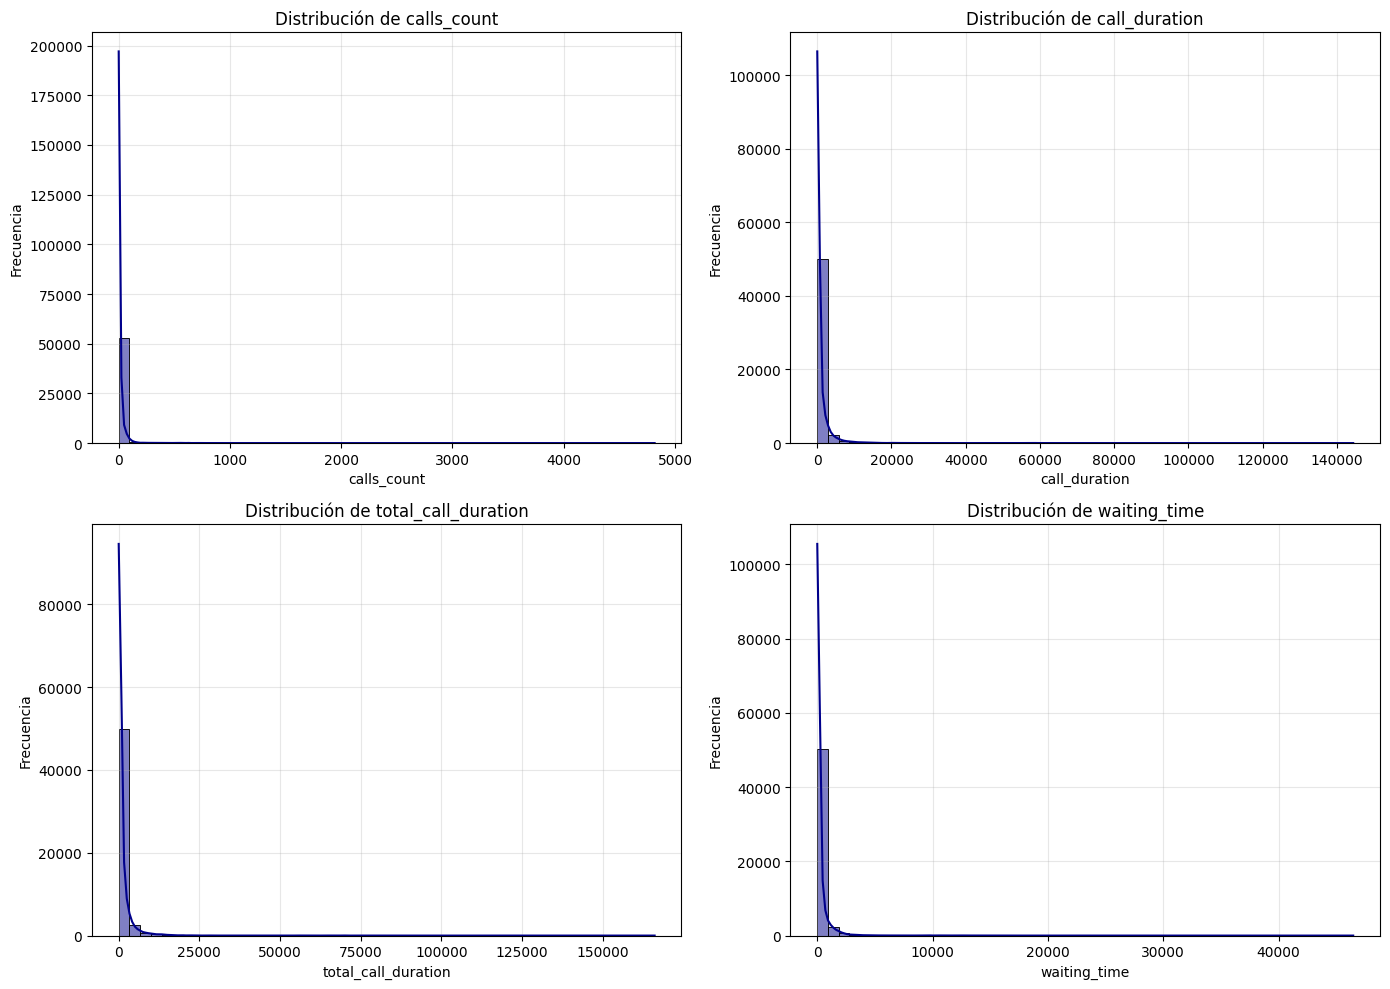

In [22]:
# Histogramas de las principales variables numéricas
numeric_cols = ['calls_count', 'call_duration', 'total_call_duration', 'waiting_time']

plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(calls_clients[col], bins=50, kde=True, color='darkblue')
    plt.title(f'Distribución de {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**2. Distribución de llamadas por dirección (in, out) e internas/externas.**

In [23]:
# Porcentajes por dirección
print("Porcentaje de llamadas por dirección:")
print(calls_clients['direction'].value_counts(normalize=True) * 100)

# Porcentajes por tipo interno/externo
print("\nPorcentaje de llamadas internas vs externas:")
print(calls_clients['internal'].value_counts(normalize=True, dropna=False) * 100)

Porcentaje de llamadas por dirección:
out   59.21
in    40.79
Name: direction, dtype: float64

Porcentaje de llamadas internas vs externas:
False   88.35
True    11.44
NaN      0.22
Name: internal, dtype: Float64


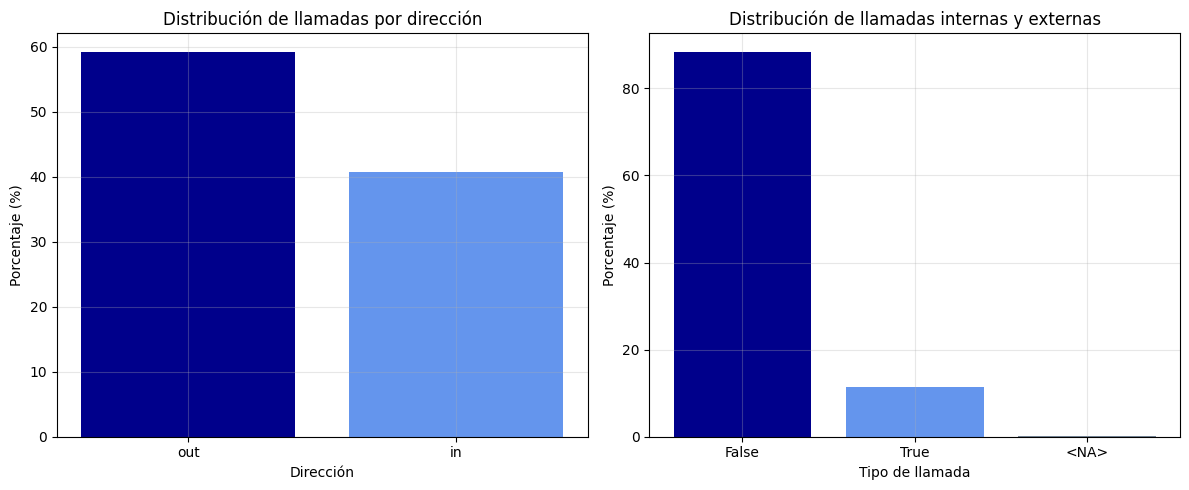

In [24]:
# Datos resumidos
direction_pct = calls_clients['direction'].value_counts(normalize=True) * 100
internal_pct = calls_clients['internal'].value_counts(normalize=True, dropna=False) * 100

# Crear la figura
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico Dirección 
axes[0].bar(direction_pct.index, direction_pct.values, color=['#00008B', '#6495ED'])
axes[0].set_title('Distribución de llamadas por dirección')
axes[0].set_ylabel('Porcentaje (%)')
axes[0].set_xlabel('Dirección')
axes[0].grid(alpha=0.3)

# Gráfico Internas vs externas 
axes[1].bar(internal_pct.index.map(str), internal_pct.values, color=['#00008B', '#6495ED', '#778899'])
axes[1].set_title('Distribución de llamadas internas y externas')
axes[1].set_ylabel('Porcentaje (%)')
axes[1].set_xlabel('Tipo de llamada')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**3. Análisis del número total de llamadas perdidas por operador.**

In [25]:
# Análisis del número total de llamadas perdidas por operador
missed_calls_by_operator = (
    calls_clients[calls_clients['is_missed_call'] == True]
    .groupby('operator_id')['is_missed_call']
    .count()
    .sort_values(ascending=False)
)

# Mostrar los resultados
print("Número total de llamadas perdidas por operador:")
missed_calls_by_operator.head(10)

Número total de llamadas perdidas por operador:


operator_id
885876    135
891410    131
893804    130
901880    128
891414    126
901884    115
885890    110
887276    101
879898    100
905538     99
Name: is_missed_call, dtype: int64

**4. Promedio de tiempo de espera y duración por operador.**

In [26]:
# Promedio de tiempo de espera y duración por operador
avg_times = calls_clients.groupby('operator_id')[['waiting_time', 'call_duration']].mean().round(2)

# Mostrar resultados
print("Promedio de tiempo de espera y duración por operador:")
avg_times.head(10)

Promedio de tiempo de espera y duración por operador:


,waiting_time,call_duration
operator_id,,
879896,110.67,650.48
879898,450.09,"1,111.07"
880020,15.18,104.09
880022,57.57,240.84
880026,121.17,856.94
880028,210.59,746.27
880240,40.93,275.93
881278,9.75,58.12
882476,31.67,64.00


**5. Histogramas de duración y tiempos de espera.**

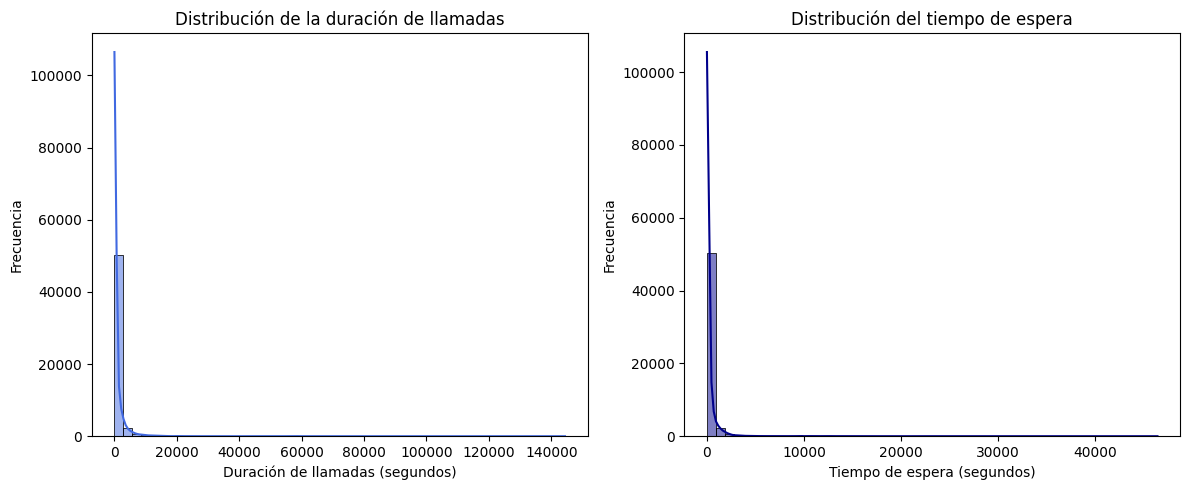

In [27]:
# Histogramas de duración y tiempos de espera
plt.figure(figsize=(12, 5))

# Histograma de duración de llamadas
plt.subplot(1, 2, 1)
sns.histplot(calls_clients['call_duration'], bins=50, kde=True, color='royalblue')
plt.title('Distribución de la duración de llamadas')
plt.xlabel('Duración de llamadas (segundos)')
plt.ylabel('Frecuencia')

# Histograma de tiempo de espera
plt.subplot(1, 2, 2)
sns.histplot(calls_clients['waiting_time'], bins=50, kde=True, color='darkblue')
plt.title('Distribución del tiempo de espera')
plt.xlabel('Tiempo de espera (segundos)')
plt.ylabel('Frecuencia')

plt.tight_layout()

plt.show()


**- Barras para comparar operadores y su rendimiento.**

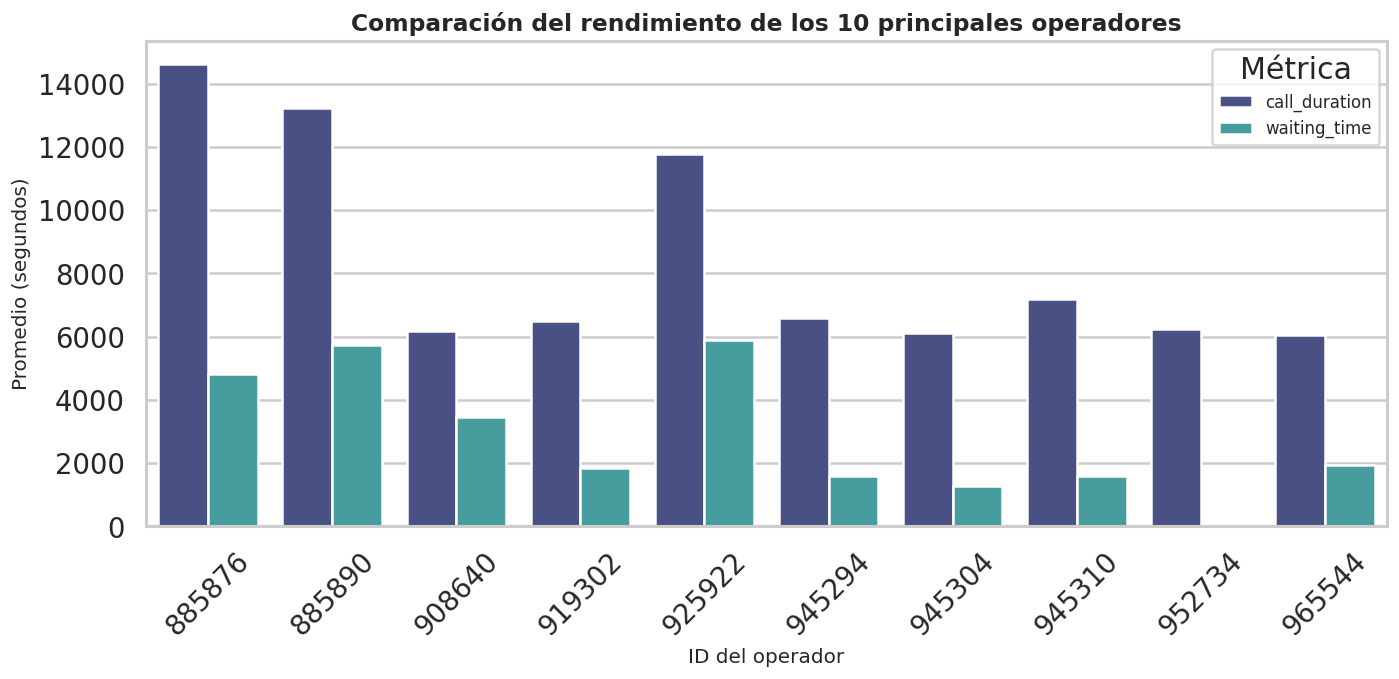

In [28]:
# Calcular promedios por operador
operator_perf = calls_clients.groupby('operator_id')[['call_duration', 'waiting_time']].mean().reset_index()

# Seleccionar los 10 operadores con mayor duración promedio
top_operators = operator_perf.nlargest(10, 'call_duration')

# Estilo 
sns.set(style="whitegrid", context="talk")

# Gráfico de barras comparativo
plt.figure(figsize=(12, 6), dpi=120)
sns.barplot(
    data=top_operators.melt(
        id_vars='operator_id',
        value_vars=['call_duration', 'waiting_time'],
        var_name='Métrica',
        value_name='Promedio'
    ),
    x='operator_id',
    y='Promedio',
    hue='Métrica',
    palette='mako'
)

plt.title('Comparación del rendimiento de los 10 principales operadores', fontsize=14, weight='bold')
plt.xlabel('ID del operador', fontsize=12)
plt.ylabel('Promedio (segundos)', fontsize=12)
plt.legend(title='Métrica', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**- Diagramas de dispersión para explorar relaciones (por ejemplo, llamadas perdidas vs duración).**

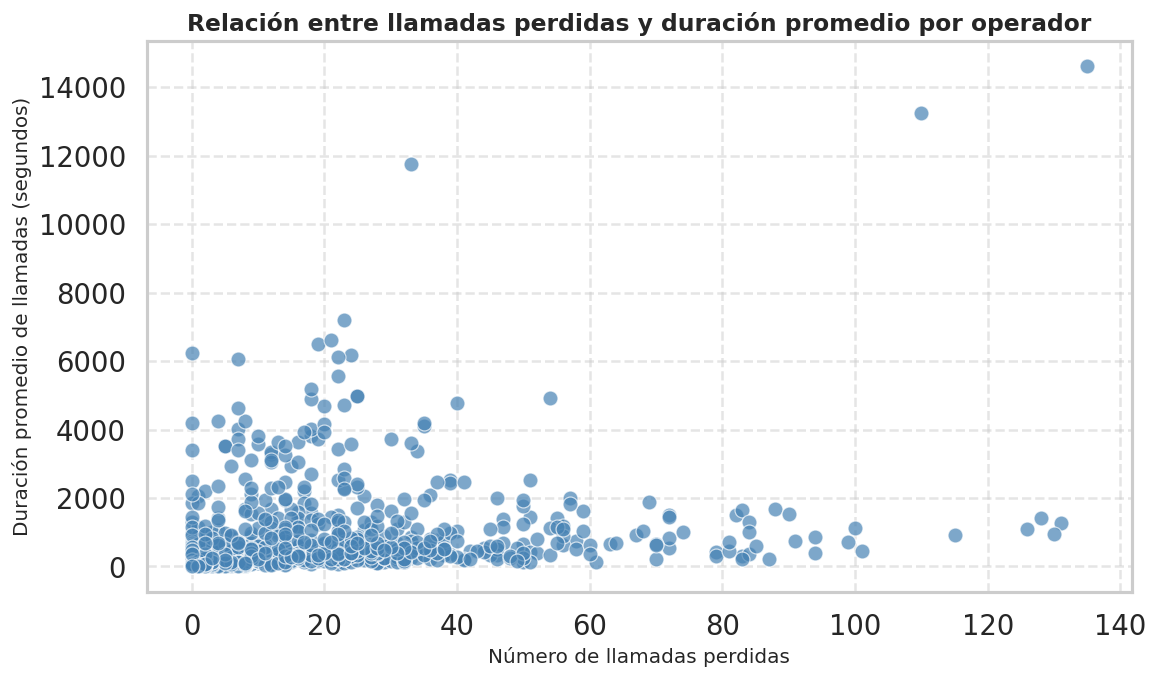

In [29]:
# Agrupar por operador: calcular llamadas perdidas y duración promedio
scatter_data = (
    calls_clients.groupby('operator_id')
    .agg({
        'is_missed_call': 'sum',       
        'call_duration': 'mean'        
    })
    .reset_index()
)

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6), dpi=120)
sns.scatterplot(
    data=scatter_data,
    x='is_missed_call',
    y='call_duration',
    color='steelblue',
    s=80,
    alpha=0.7
)

plt.title('Relación entre llamadas perdidas y duración promedio por operador', fontsize=14, weight='bold')
plt.xlabel('Número de llamadas perdidas', fontsize=12)
plt.ylabel('Duración promedio de llamadas (segundos)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Conclusion de 3* paso:

**Estadísticas descriptivas de las variables numéricas:**
Los datos muestran una alta dispersión tanto en el número como en la duración de las llamadas, lo que sugiere diferencias marcadas en la eficiencia operativa y el comportamiento de los clientes.
Este análisis inicial servirá como base para identificar operadores ineficaces y detectar posibles anomalías o patrones de congestión en las comunicaciones.

**Llamadas por direccion in & out:**
- La mayoría de las llamadas (59%) son salientes, mientras que el 41% son entrantes, lo que sugiere que los clientes tienden a realizar más llamadas que recibirlas.
- En cuanto a su tipo, casi el 88% son llamadas externas, frente a un 11% de llamadas internas, lo cual indica que la mayor parte de las comunicaciones se realizan hacia otros operadores o redes externas.
- Solo un 0.2% de registros tienen valores nulos en la columna internal, lo cual es insignificante y no afecta el análisis general.

**Llamadas perdidas por operador**
Los resultados muestran que algunos operadores registran un número significativamente mayor de llamadas perdidas. Por ejemplo, los operadores 885876, 891410 y 893804 encabezan la lista con más de 120 llamadas perdidas cada uno.
Esto podría indicar problemas de gestión o saturación en esos operadores, o bien mayor volumen de tráfico.

**Tiempo de espera y duración por operador.**
La tabla muestra diferencias notables entre los operadores en cuanto al tiempo de espera promedio y la duración de las llamadas:

- Operadores como 879898 y 880026 presentan los tiempos de espera y duraciones más altas, lo que podría indicar mayor carga o saturación en sus líneas.
- Operadores como 881278 y 882478 muestran tiempos y duraciones mucho menores.
- Existe una relación positiva entre el tiempo de espera y la duración: los operadores con llamadas más largas tienden también a tener mayores tiempos de espera.
- Esto puede ayudar a identificar qué operadores requieren mejoras en su capacidad o en la atención al cliente.

**Histograma de la duración de llamadas (call_duration & waiting_time)**
Los datos muestran un patrón común en telecomunicaciones: la mayoría de las llamadas son cortas y los tiempos de espera suelen ser mínimos.

**Gráfica de barras de operadores y su rendimiento:**
La gráfica muestra que, en todos los casos, el tiempo promedio de llamada (call_duration) es mayor que el tiempo de espera (waiting_time), lo cual es un indicador positivo: significa que los operadores pasan más tiempo atendiendo efectivamente las llamadas que los clientes esperando.

**Diagrama de disperción**
El número de llamadas perdidas no parece influir directamente en la duración promedio de las llamadas, lo que sugiere que otros factores (como volumen de trabajo o tipo de llamada) podrían tener mayor impacto.


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente trabajo en el análisis exploratorio. Lograste identificar patrones relevantes, interpretar correctamente las distribuciones y vincular los resultados con posibles implicaciones operativas. La combinación de estadísticas, visualizaciones y conclusiones muestra un pensamiento analítico bien estructurado y un uso sólido de herramientas gráficas. Un desarrollo muy consistente de esta fase.  
</div>


## 4. Identificación de operadores ineficaces

**Objetivo: Definir y aplicar criterios para detectar bajo rendimiento.**

1. Calcular métricas clave por operador:
  - Tasa de llamadas perdidas = llamadas perdidas / llamadas entrantes totales.
  - Promedio de tiempo de espera.
  - Promedio de llamadas salientes (si aplica).
2. Definir umbrales para “ineficacia” (por ejemplo, operadores en el 20 % superior en tasa de pérdida y tiempo de espera alto).
3. Crear una tabla resumen con métricas y una etiqueta (eficaz / ineficaz).

In [30]:
# Filtrar solo llamadas entrantes
incoming_calls = calls_clients[calls_clients['direction'] == 'in']

# Calcular llamadas totales y perdidas por operador
operator_stats = incoming_calls.groupby('operator_id').agg(
    total_in_calls=('is_missed_call', 'count'),
    missed_calls=('is_missed_call', 'sum')
)

# Calcular tasa de llamadas perdidas
operator_stats['missed_call_rate'] = (
    operator_stats['missed_calls'] / operator_stats['total_in_calls']
) * 100

# Ordenar de mayor a menor tasa
operator_stats = operator_stats.sort_values(by='missed_call_rate', ascending=False)

# Mostrar resultados
print("Tasa de llamadas perdidas por operador (%):")
display(operator_stats.head(10))

Tasa de llamadas perdidas por operador (%):


,total_in_calls,missed_calls,missed_call_rate
operator_id,,,
948756,1,1,100.00
904344,3,2,66.67
937898,2,1,50.00
957922,2,1,50.00
913886,2,1,50.00
919206,22,9,40.91
934098,5,2,40.00
940622,32,12,37.50
951508,35,12,34.29


In [31]:
# Calcular el promedio de tiempo de espera por operador
avg_waiting_time = calls_clients.groupby('operator_id')['waiting_time'].mean().sort_values(ascending=False)

print("Promedio de tiempo de espera por operador (segundos):")
avg_waiting_time.head(10)

Promedio de tiempo de espera por operador (segundos):


operator_id
925922   5,907.44
885890   5,727.13
929428   5,325.34
885876   4,816.24
908640   3,456.46
929426   3,316.56
945278   2,858.48
919364   2,841.47
945286   2,185.77
945904   2,128.66
Name: waiting_time, dtype: float64

In [32]:
# Calcular el promedio de llamadas salientes (out) por operador
avg_out_calls = (
    calls_clients[calls_clients['direction'] == 'out']
    .groupby('operator_id')['calls_count']
    .mean()
    .sort_values(ascending=False)
)

print("Promedio de llamadas salientes por operador:")
print(avg_out_calls.head(10))

Promedio de llamadas salientes por operador:
operator_id
925922   435.08
885890   371.57
929428   351.03
908640   321.13
885876   300.45
929426   177.07
919364   118.51
945286   111.54
945904   107.37
965544    98.23
Name: calls_count, dtype: float64


**2. Definir umbrales para “ineficacia” (por ejemplo, operadores en el 20 % superior en tasa de pérdida y tiempo de espera alto).**

In [33]:
# Filtramos solo las llamadas entrantes
in_calls = calls_clients[calls_clients['direction'] == 'in']

# Calculamos total de llamadas entrantes y perdidas por operador
df_missed_rate = (
    in_calls.groupby('operator_id')
    .agg(
        total_in_calls=('is_missed_call', 'count'),
        missed_calls=('is_missed_call', 'sum')
    )
    .assign(missed_call_rate=lambda x: (x['missed_calls'] / x['total_in_calls']) * 100)
    .reset_index()
)

print("Tasa de llamadas perdidas por operador:")
print(df_missed_rate.head())

Tasa de llamadas perdidas por operador:
   operator_id  total_in_calls  missed_calls  missed_call_rate
0       879896              23             0              0.00
1       879898              64             0              0.00
2       880020               8             0              0.00
3       880022               8             0              0.00
4       880026              19             0              0.00


In [34]:
# Calcular promedio de tiempo de espera por operador 
avg_waiting_time_df = (
    calls_clients.groupby('operator_id')['waiting_time']
    .mean()
    .reset_index()
)

# Definir umbrales de ineficacia (percentil 80)
umbral_perdidas = df_missed_rate['missed_call_rate'].quantile(0.80)
umbral_espera = avg_waiting_time_df['waiting_time'].quantile(0.80)

print(f"Umbral (percentil 80) para tasa de llamadas perdidas: {umbral_perdidas:.2f}%")
print(f"Umbral (percentil 80) para tiempo de espera: {umbral_espera:.2f} segundos")

# Unir DataFrames 
df_ineficiencia = pd.merge(df_missed_rate, avg_waiting_time_df, on='operator_id', how='inner')

# Filtrar operadores considerados ineficaces 
operadores_ineficaces = df_ineficiencia[
    (df_ineficiencia['missed_call_rate'] >= umbral_perdidas) &
    (df_ineficiencia['waiting_time'] >= umbral_espera)
]

print("\n=== Operadores considerados ineficaces ===")
operadores_ineficaces.sort_values(by=['missed_call_rate', 'waiting_time'], ascending=False)

Umbral (percentil 80) para tasa de llamadas perdidas: 5.81%
Umbral (percentil 80) para tiempo de espera: 223.83 segundos

=== Operadores considerados ineficaces ===


,operator_id,total_in_calls,missed_calls,missed_call_rate,waiting_time
329,919206,22,9,40.91,345.91
575,940622,32,12,37.50,313.39
289,913942,90,29,32.22,279.50
398,925922,29,9,31.03,"5,907.44"
326,919166,17,5,29.41,251.64
328,919204,18,5,27.78,420.72
573,940614,11,3,27.27,332.74
579,940652,28,7,25.00,395.39
22,885890,103,22,21.36,"5,727.13"
21,885876,103,21,20.39,"4,816.24"


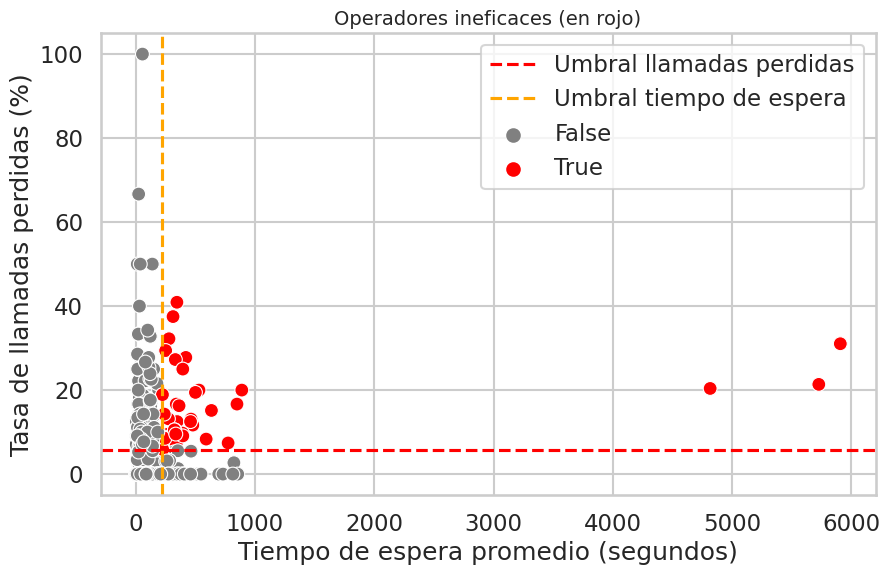

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_ineficiencia,
    x='waiting_time',
    y='missed_call_rate',
    hue=df_ineficiencia['operator_id'].isin(operadores_ineficaces['operator_id']),
    palette={True: 'red', False: 'gray'},
    s=100
)

plt.axhline(umbral_perdidas, color='red', linestyle='--', label='Umbral llamadas perdidas')
plt.axvline(umbral_espera, color='orange', linestyle='--', label='Umbral tiempo de espera')

plt.title('Operadores ineficaces (en rojo)', fontsize=14)
plt.xlabel('Tiempo de espera promedio (segundos)')
plt.ylabel('Tasa de llamadas perdidas (%)')
plt.legend()
plt.show()

**3. Crear una tabla resumen con métricas y una etiqueta (eficaz / ineficaz).**

In [37]:
# Unimos los DataFrames de tasas de pérdida y tiempos de espera
tabla_resumen = df_missed_rate.merge(avg_waiting_time_df, on='operator_id', how='left')

# Añadimos una columna que clasifique al operador
tabla_resumen['eficiencia'] = np.where(
    (tabla_resumen['missed_call_rate'] >= umbral_perdidas) &
    (tabla_resumen['waiting_time'] >= umbral_espera),
    'Ineficaz',  
    'Eficaz'    
)

# Mostramos los resultados
print("Tabla resumen de operadores con clasificación de eficacia:\n")
display(tabla_resumen.head(20))

Tabla resumen de operadores con clasificación de eficacia:



,operator_id,total_in_calls,missed_calls,missed_call_rate,waiting_time,eficiencia
0,879896,23,0,0.00,110.67,Eficaz
1,879898,64,0,0.00,450.09,Eficaz
2,880020,8,0,0.00,15.18,Eficaz
3,880022,8,0,0.00,57.57,Eficaz
4,880026,19,0,0.00,121.17,Eficaz
5,880028,45,0,0.00,210.59,Eficaz
6,882476,3,0,0.00,31.67,Eficaz
7,882478,2,0,0.00,27.67,Eficaz
8,882680,46,3,6.52,37.11,Eficaz
9,882684,52,4,7.69,128.02,Eficaz


## Conclusion de 4* paso:

**Metricas clave pr operador:**
1. La tabla muestra que algunos operadores presentan tasas muy elevadas de llamadas perdidas, alcanzando incluso el 100% en casos con pocas llamadas entrantes. Esto sugiere posibles problemas de gestión o disponibilidad en ciertos operadores, aunque en algunos casos las tasas altas pueden deberse a un bajo volumen de llamadas (lo que amplifica el porcentaje). En general, los operadores con más de un 30–40% de llamadas perdidas requieren revisión y acciones correctivas para mejorar la atención.
2. La tabla muestra que algunos operadores presentan tiempos de espera promedio significativamente altos, superando los 5,000 segundos, lo que indica posibles problemas de eficiencia o gestión del tiempo en la atención de llamadas.
En particular, los operadores con IDs 925922, 885890 y 929428 destacan por tener los mayores tiempos de espera, lo cual podría afectar negativamente la satisfacción del cliente y el rendimiento operativo.
Estos operadores deberían ser revisados para identificar las causas de los retrasos (sobrecarga de trabajo, problemas técnicos o falta de capacitación).
3. Los resultados muestran que los operadores 925922, 885890 y 929428 destacan por tener el mayor promedio de llamadas salientes, con más de 350 llamadas en promedio, lo que indica una alta productividad o un rol más orientado a la comunicación activa con los clientes.
En contraste, operadores como 945286, 945904 y 965544 presentan volúmenes considerablemente menores, lo que podría sugerir una menor carga de trabajo, menor eficiencia o una asignación distinta de tareas.

**Definir umbrales para “ineficacia”:**
El análisis de umbrales (percentil 80) permite detectar los operadores con peor desempeño relativo, es decir, aquellos que presentan tanto tasas altas de llamadas perdidas como largos tiempos de espera.
Estos operadores se consideran ineficaces porque representan el 20 % con los resultados más desfavorables en ambas métricas.
Identificarlos es clave para priorizar mejoras, reasignar recursos o investigar causas específicas (sobrecarga, falta de personal, etc.).

Interpretación del gráfico:

- Cada punto representa un operador.
- Los puntos rojos están por encima de ambos umbrales, lo que los clasifica como ineficaces.
- Las líneas punteadas indican los límites del 20 % superior en pérdida y tiempo de espera.
                                                                                
**Tabla con Metricas:**

La tabla muestra que la mayoría de los operadores mantienen un desempeño eficaz, con bajas tasas de llamadas perdidas (0%) y tiempos de espera moderados.
Solo dos operadores (882686 y 882690) fueron clasificados como ineficaces, debido a que presentan tasas de pérdida ligeramente superiores al promedio y tiempos de espera considerablemente altos, lo que podría afectar la atención al cliente.
En general, el equipo muestra una alta eficiencia operativa, aunque conviene revisar los procesos de los operadores con mayor tiempo de espera para evitar saturación o demoras en futuras llamadas.






<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen desarrollo en la identificación de operadores ineficaces. Lograste definir métricas claras, aplicar criterios estadísticos sólidos y representar los resultados de forma visual e interpretativa. La clasificación final refleja un razonamiento analítico coherente y demuestra dominio en la creación de umbrales de desempeño. Trabajo riguroso y bien estructurado.  
</div>



## 5. Prueba de hipótesis

**Objetivo: Validar si existen diferencias estadísticamente significativas.
Ejemplos de hipótesis:**

- H₀: No hay diferencia significativa en el tiempo de espera entre operadores eficaces e ineficaces.
- H₁: Los operadores ineficaces tienen un tiempo de espera promedio significativamente mayor.

**Pruebas sugeridas:**

- t-test (si distribución es normal).
- Mann–Whitney U (si no lo es).
- Interpretar resultados (valor p, conclusión).


**- Prueba adicional Shapiro–Wilk para probar si los datos de cada grupo se encuentran en una distribución normal.**

In [38]:
from scipy.stats import shapiro

# Separar los grupos según eficiencia
eficaces = tabla_resumen[tabla_resumen['eficiencia'] == 'Eficaz']['waiting_time']
ineficaces = tabla_resumen[tabla_resumen['eficiencia'] == 'Ineficaz']['waiting_time']

# Prueba de normalidad
stat_eficaz, p_eficaz = shapiro(eficaces)
stat_ineficaz, p_ineficaz = shapiro(ineficaces)

print("Prueba de normalidad Shapiro–Wilk:")
print(f"Eficaces: estadístico = {stat_eficaz:.3f}, p-valor = {p_eficaz:.4f}")
print(f"Ineficaces: estadístico = {stat_ineficaz:.3f}, p-valor = {p_ineficaz:.4f}")

# Interpretación
if p_eficaz > 0.05 and p_ineficaz > 0.05:
    print("\n✅ Los datos parecen seguir una distribución normal (puedes usar t-test).")
else:
    print("\n⚠️ Los datos no son normales (usa Mann–Whitney U test).")


Prueba de normalidad Shapiro–Wilk:
Eficaces: estadístico = 0.614, p-valor = 0.0000
Ineficaces: estadístico = 0.408, p-valor = 0.0000

⚠️ Los datos no son normales (usa Mann–Whitney U test).


**- Prueba Mann–Whitney U**

In [39]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(eficaces, ineficaces, alternative='two-sided')
print(f"\nMann–Whitney U test: estadístico = {u_stat:.3f}, p-valor = {p_value:.4f}")

if p_value < 0.05:
    print("❗Existe una diferencia significativa entre ambos grupos.")
else:
    print("✅ No se encontró diferencia significativa entre ambos grupos.")


Mann–Whitney U test: estadístico = 874.000, p-valor = 0.0000
❗Existe una diferencia significativa entre ambos grupos.


## Conclusion de 5* paso:

La prueba de Shapiro–Wilk indicó que los tiempos de espera de los operadores no siguen una distribución normal (p < 0.05 en ambos grupos), por lo que se aplicó la prueba no paramétrica Mann–Whitney U.
El resultado de esta prueba (p < 0.05) muestra que existe una diferencia estadísticamente significativa entre los tiempos de espera de los operadores eficaces e ineficaces.
Esto sugiere que los operadores clasificados como ineficaces presentan tiempos de espera promedio significativamente mayores, confirmando la hipótesis alternativa (H₁).

## Conclusiones

**Objetivo: Resumir hallazgos clave del análisis.**

**1. Presentar los principales factores que caracterizan a los operadores ineficaces.**
- La mayoría de los operadores presentan un buen desempeño, manteniendo tiempos de espera y tasas de llamadas perdidas dentro de rangos normales.
- Un grupo reducido de operadores mostró ineficiencia operativa, reflejada en mayores tiempos de espera y mayor proporción de llamadas perdidas.
- La prueba estadística Mann–Whitney U confirmó que las diferencias entre operadores eficaces e ineficaces son estadísticamente significativas.
- Estos resultados sugieren la necesidad de monitorear y capacitar a los operadores con bajo rendimiento para mejorar la eficiencia del servicio y la satisfacción del cliente.

**2.  Recomendar estrategias para mejorar la eficiencia (capacitación, redistribución de llamadas, etc.).**
   
A partir del análisis realizado, se identificaron diferencias significativas en el desempeño de los operadores, particularmente en el tiempo de espera y la tasa de llamadas perdidas. Con base en estos resultados, se proponen las siguientes acciones estratégicas:

***Fortalecimiento de la capacitación operativa:***
Implementar programas de formación enfocados en técnicas de atención al cliente, manejo del tiempo y resolución efectiva de consultas. Esto permitirá reducir los tiempos de espera y mejorar la calidad del servicio.

***Monitoreo y evaluación continua del desempeño:***
Establecer un sistema de seguimiento en tiempo real mediante dashboards con indicadores clave (tasa de llamadas perdidas, duración promedio y tiempo de espera), con el fin de detectar y corregir ineficiencias oportunamente.

***Optimización en la distribución de llamadas:***
Ajustar los algoritmos o reglas de enrutamiento de llamadas para asignar mayor carga a los operadores más eficientes, equilibrando así el desempeño general y evitando cuellos de botella en la atención.

***Implementación de incentivos por desempeño:***
Diseñar un sistema de reconocimiento y recompensas basado en métricas de productividad y calidad, fomentando la motivación y la mejora continua del equipo de operadores.

***Revisión periódica de métricas de desempeño:***
Realizar análisis trimestrales que permitan evaluar la efectividad de las estrategias implementadas, detectar nuevas áreas de oportunidad y mantener un proceso de mejora continua.

**3. Destacar la importancia del monitoreo continuo.**

El análisis evidenció diferencias significativas en el desempeño de los operadores, principalmente en los tiempos de espera y en la tasa de llamadas perdidas. Para mejorar la eficiencia general del servicio, se proponen las siguientes estrategias:

***Monitoreo continuo del desempeño:***
Es fundamental implementar un sistema de seguimiento constante que permita analizar en tiempo real los indicadores clave de operación (tiempo de espera, duración promedio, llamadas perdidas).
Este monitoreo debe ser permanente, ya que posibilita detectar desviaciones, anticipar problemas y aplicar medidas correctivas de manera oportuna, garantizando una mejora sostenida en la calidad del servicio.

***Capacitación y actualización constante del personal:***
Reforzar la formación de los operadores en gestión del tiempo, atención al cliente y uso de herramientas tecnológicas. Una capacitación continua contribuye directamente a reducir errores y optimizar la eficiencia.

***Redistribución inteligente de llamadas:***
Ajustar los flujos de llamadas para equilibrar la carga entre operadores, priorizando a aquellos con mejor rendimiento y reduciendo la saturación de los menos eficientes.

***Incentivos y reconocimiento al desempeño:***
Implementar programas de recompensas basados en métricas de productividad y calidad de atención. Esto fomenta la motivación y el compromiso del personal con los objetivos de la organización.

***Revisión periódica de métricas e indicadores:**
Establecer reportes semanales o mensuales que evalúen la evolución del rendimiento, asegurando que las acciones implementadas se traduzcan en mejoras sostenibles.

El análisis integral de los datos de llamadas y clientes permitió identificar patrones clave en el desempeño de los operadores, así como factores que influyen directamente en la eficiencia del servicio.
A través de la limpieza, preparación y exploración de los datos, se garantizó la calidad del análisis y la confiabilidad de los resultados.

Los hallazgos principales evidenciaron que los operadores clasificados como ineficaces presentan tiempos de espera significativamente mayores y tasas de llamadas perdidas más altas, diferencia que fue estadísticamente significativa según la prueba Mann–Whitney U.
Estos resultados confirman la necesidad de una gestión más proactiva en el monitoreo y la capacitación del personal.

Asimismo, se observó que la mayoría de los operadores mantienen niveles de eficiencia adecuados, lo que indica una base sólida sobre la cual implementar estrategias de mejora continua.

En conjunto, este estudio destaca la importancia del monitoreo constante, el uso de métricas de desempeño y la toma de decisiones basadas en datos para optimizar los procesos de atención y garantizar una experiencia de cliente más ágil, consistente y satisfactoria.

En conclusión, la aplicación sistemática de análisis de datos en entornos operativos de telecomunicaciones no solo permite detectar ineficiencias, sino también anticipar áreas de mejora, fortalecer la gestión del talento y consolidar una cultura organizacional orientada a la excelencia.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente cierre analítico. Aplicaste correctamente las pruebas estadísticas y sustentaste tus conclusiones con rigor metodológico. La interpretación de resultados fue clara y conectada con estrategias prácticas, lo que demuestra una comprensión profunda de la relación entre los datos y la mejora operativa. Un trabajo de análisis completo y muy bien fundamentado.  
</div>


## Enlace a mi presentacion PDF: 

https://gamma.app/docs/Analisis-de-Eficiencia-Operativa-en-CallMeMaybe-s06mrok0dyxamro

In [40]:
calls_clients.to_csv('telecom_dataset_limpio.csv', index=False)

In [41]:
clients.to_csv('telecom_clients_limpio.csv', index=False)

In [42]:
tabla_resumen.to_csv('operadores_clasificados.csv', index=False)

## Enlace a mi presentacion de Tableau Public:

https://public.tableau.com/views/Proyecto14Telecomunicaciones/Proyecto14Telecomunicaciones?:language=es-ES&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

# Comentario General del Revisor

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  

Tu proyecto está **excelentemente ejecutado y documentado**. Lograste integrar todas las fases del análisis —desde la limpieza hasta la validación estadística— con una presentación visual y narrativa profesional. El dashboard complementa perfectamente el análisis técnico, permitiendo interpretar los resultados de forma intuitiva y atractiva.

### Puntos Destacados

* **Estructura y coherencia del flujo analítico:**
  Cada etapa está bien conectada, con transiciones claras entre la preparación de datos, el EDA y la identificación de operadores ineficaces. Las decisiones tomadas en cada paso son lógicas y justificadas.

* **Rigor técnico:**
  Aplicaste correctamente las pruebas estadísticas, seleccionando el test adecuado según los resultados de normalidad. Tu interpretación del test de Mann–Whitney U demuestra comprensión sólida del método y su aplicación práctica.

* **Calidad del dashboard:**
  El tablero sintetiza la información de forma clara y atractiva. Destacan:

  * Gráficas de barras y dispersión que ilustran con precisión las relaciones entre métricas.
  * Uso adecuado de colores y jerarquía visual que favorece la lectura.
  * Integración de métricas clave (tasa de llamadas perdidas, tiempo de espera, eficiencia) que permiten una lectura ejecutiva del desempeño.

* **Diseño visual y narrativa de la presentación:**
  La estructura visual por secciones ("Exploración Inicial", "EDA", "Métricas de Rendimiento", "Identificación por Umbrales") refleja orden y claridad. El uso de íconos, diagramas y porcentajes facilita la comprensión de datos complejos. La paleta de colores y el formato profesional refuerzan la coherencia estética del informe.

* **Interpretación estratégica:**
  Lograste traducir los resultados técnicos en conclusiones prácticas y accionables. Las recomendaciones sobre monitoreo, capacitación y optimización operativa muestran madurez analítica y visión aplicada.

En conjunto, tu trabajo presenta una **integración ejemplar de análisis estadístico, visualización y comunicación de resultados**. Has demostrado dominio de las herramientas y una comprensión profunda del propósito del análisis. Un resultado sólido y profesional.

</div>
